Random Forest Regressor Models with HFT with and without the top 10 most commonly used technical indicators

In [21]:
# pip install pandas scikit-learn matplotlib

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Display the first few rows to inspect the data
print(df.head())


   Unnamed: 0                 date    open    high     low   close  volume  \
0       43815  2020-02-28 07:30:00  288.70  289.92  288.03  289.91   31680   
1       43816  2020-02-28 07:31:00  289.91  290.43  289.22  290.18   20765   
2       43817  2020-02-28 07:32:00  290.15  291.11  290.11  291.07   14026   
3       43818  2020-02-28 07:33:00  291.08  291.49  290.13  290.28   15016   
4       43819  2020-02-28 07:34:00  290.28  291.97  290.21  291.59   15471   

   barCount  average  
0     11130  288.767  
1     11020  289.787  
2      7217  290.689  
3      8383  290.775  
4      8085  291.329  


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features (X) and target (y)
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Predict on the test set
y_pred = rfr.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 9.144828709549665e-05
R-squared: 0.9999991909602816


Simple Moving Average (SMA)

MSE without SMA: 9.144828709549665e-05
R-squared without SMA: 0.9999991909602816
MSE with SMA: 9.10346783011675e-05
R-squared with SMA: 0.9999991989303122


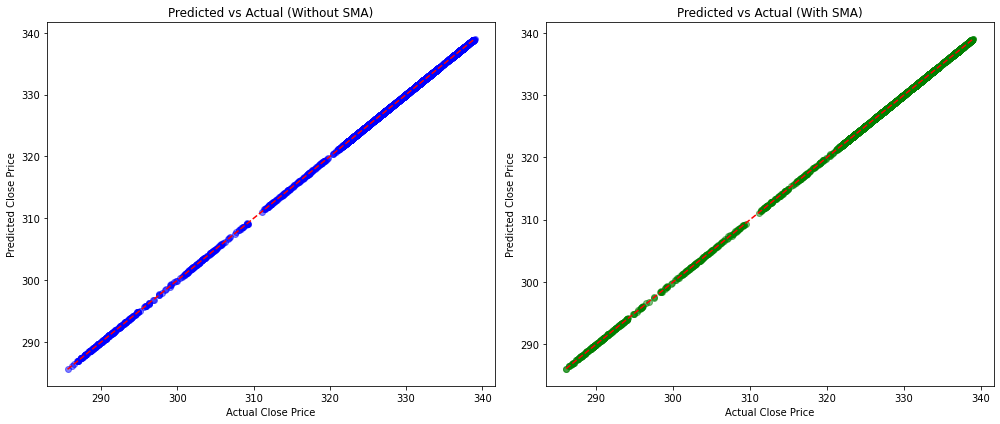

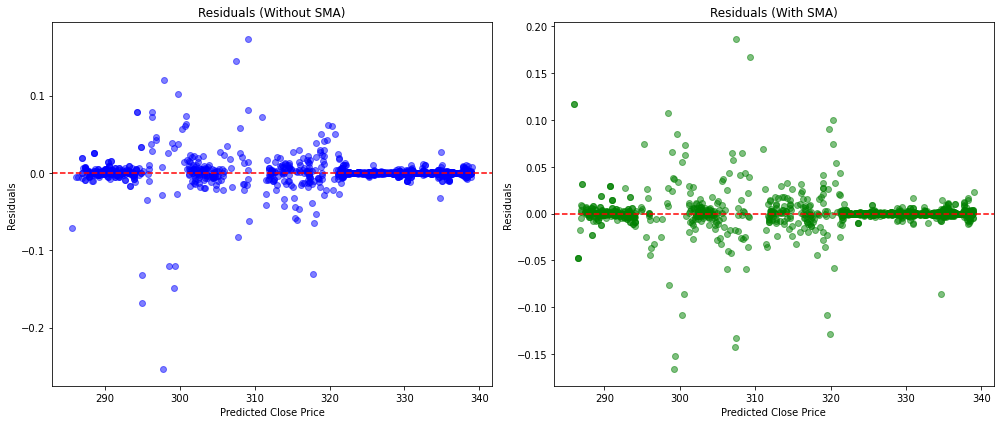

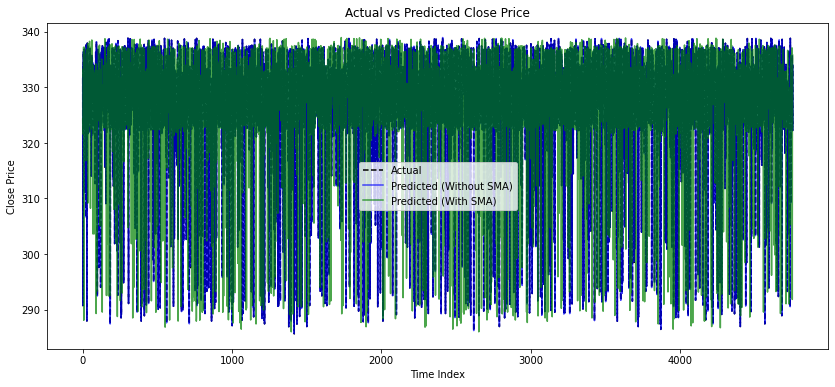

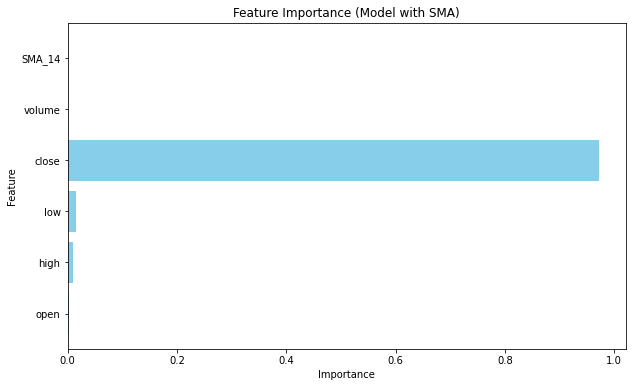

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the 14-period SMA
df['SMA_14'] = df['close'].rolling(window=14).mean()

# Prepare the feature set without SMA
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Prepare the feature set with SMA
X_with_sma = df[['open', 'high', 'low', 'close', 'volume', 'SMA_14']].dropna()
y_with_sma = df['close'][df['SMA_14'].notna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sma, X_test_sma, y_train_sma, y_test_sma = train_test_split(X_with_sma, y_with_sma, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without SMA
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with SMA
rfr_sma = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_sma.fit(X_train_sma, y_train_sma)
y_pred_sma = rfr_sma.predict(X_test_sma)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
r2_sma = r2_score(y_test_sma, y_pred_sma)

# Print the performance metrics
print(f'MSE without SMA: {mse}')
print(f'R-squared without SMA: {r2}')
print(f'MSE with SMA: {mse_sma}')
print(f'R-squared with SMA: {r2_sma}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_sma, y_pred_sma, alpha=0.5, color='green')
plt.plot([y_test_sma.min(), y_test_sma.max()], [y_test_sma.min(), y_test_sma.max()], '--r')
plt.title('Predicted vs Actual (With SMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without SMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With SMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_sma, y_test_sma - y_pred_sma, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With SMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without SMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_sma)), y_pred_sma, label='Predicted (With SMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with SMA
feature_importances = rfr_sma.feature_importances_
features = X_with_sma.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with SMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Exponetial Moving Average (EMA)

MSE without EMA: 9.144828709549665e-05
R-squared without EMA: 0.9999991909602816
MSE with EMA: 9.837895334180963e-05
R-squared with EMA: 0.9999991296449258


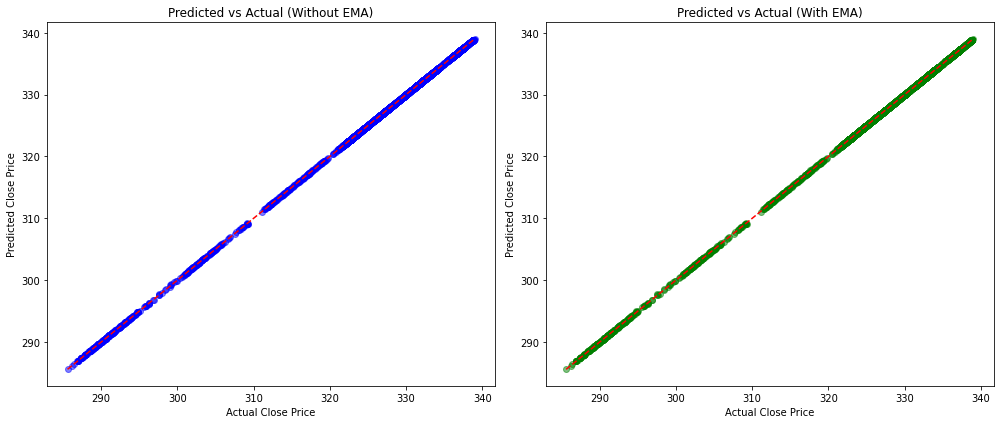

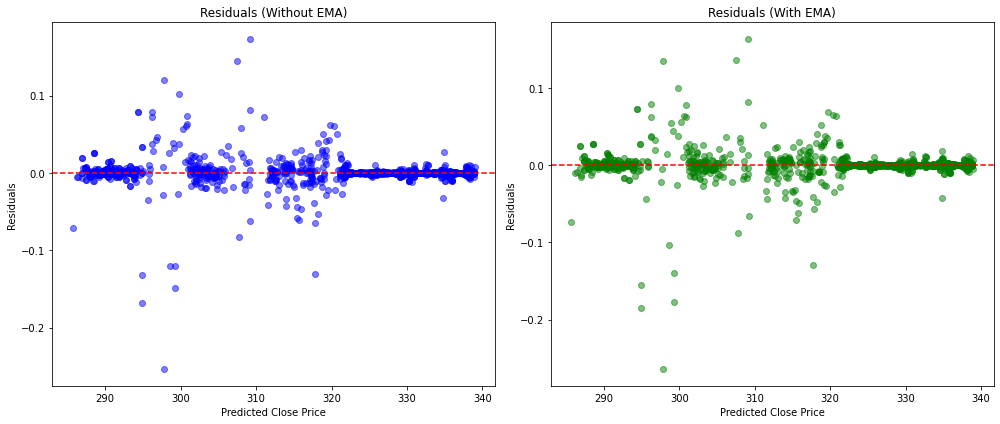

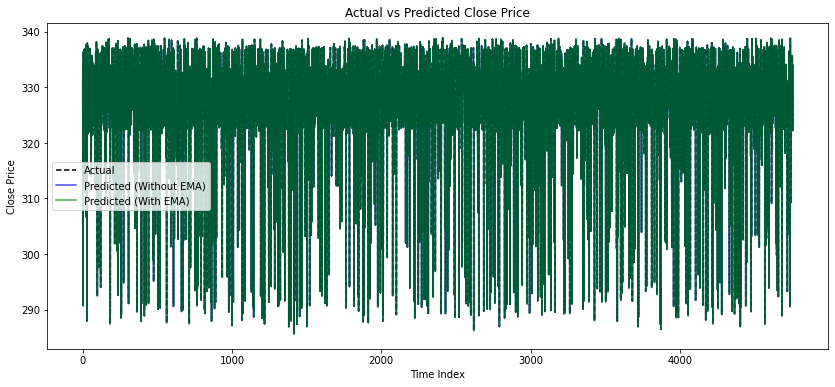

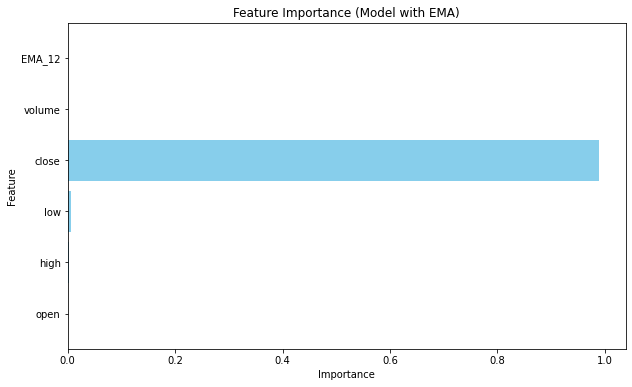

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the 12-period EMA
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()

# Prepare the feature set without EMA
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Prepare the feature set with EMA
X_with_ema = df[['open', 'high', 'low', 'close', 'volume', 'EMA_12']].dropna()
y_with_ema = df['close'][df['EMA_12'].notna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ema, X_test_ema, y_train_ema, y_test_ema = train_test_split(X_with_ema, y_with_ema, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without EMA
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with EMA
rfr_ema = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_ema.fit(X_train_ema, y_train_ema)
y_pred_ema = rfr_ema.predict(X_test_ema)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_ema = mean_squared_error(y_test_ema, y_pred_ema)
r2_ema = r2_score(y_test_ema, y_pred_ema)

# Print the performance metrics
print(f'MSE without EMA: {mse}')
print(f'R-squared without EMA: {r2}')
print(f'MSE with EMA: {mse_ema}')
print(f'R-squared with EMA: {r2_ema}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_test_ema, y_pred_ema, alpha=0.5, color='green')
plt.plot([y_test_ema.min(), y_test_ema.max()], [y_test_ema.min(), y_test_ema.max()], '--r')
plt.title('Predicted vs Actual (With EMA)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without EMA
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With EMA
plt.subplot(1, 2, 2)
plt.scatter(y_pred_ema, y_test_ema - y_pred_ema, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With EMA)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without EMA)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_ema)), y_pred_ema, label='Predicted (With EMA)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with EMA
feature_importances = rfr_ema.feature_importances_
features = X_with_ema.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with EMA)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Moving Average Convergence Divergence (MACD)

MSE without MACD: 9.144828709549665e-05
R-squared without MACD: 0.9999991909602816
MSE with MACD: 0.0001042567696511654
R-squared with MACD: 0.9999990776440955


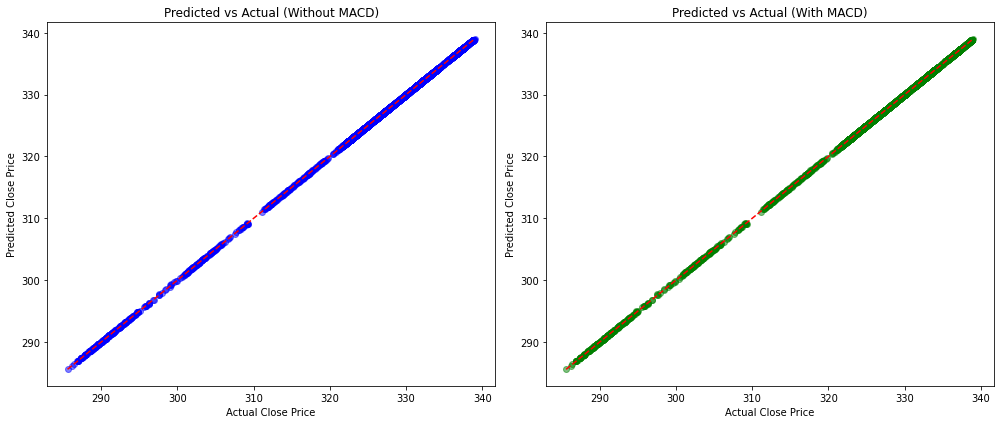

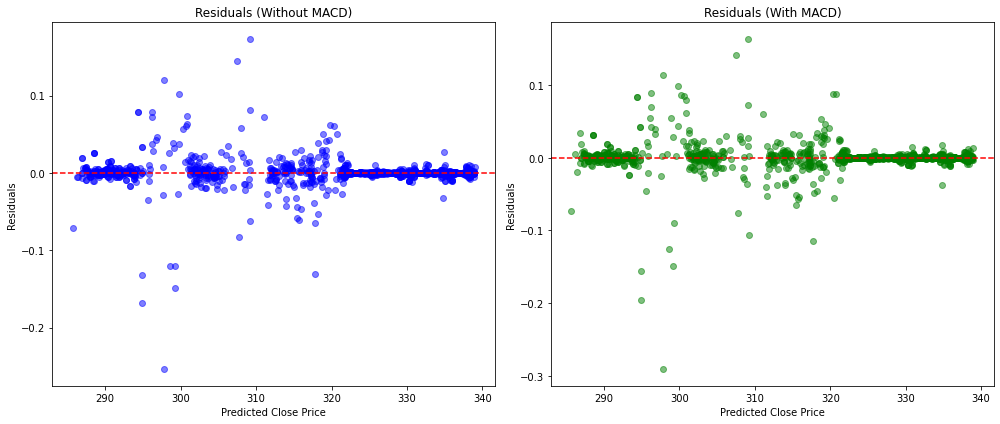

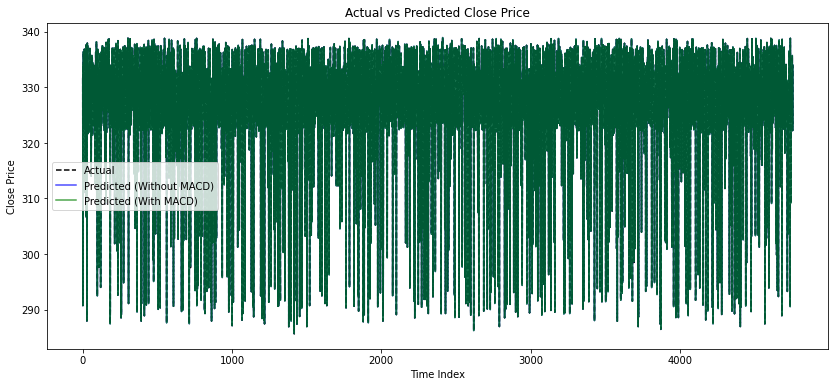

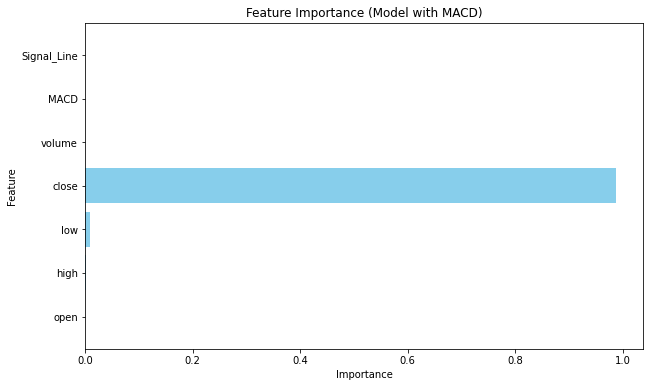

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the 12-period and 26-period EMA
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD and the Signal Line
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Prepare the feature set without MACD
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Prepare the feature set with MACD
X_with_macd = df[['open', 'high', 'low', 'close', 'volume', 'MACD', 'Signal_Line']].dropna()
y_with_macd = df['close'][df['MACD'].notna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_macd, X_test_macd, y_train_macd, y_test_macd = train_test_split(X_with_macd, y_with_macd, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without MACD
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with MACD
rfr_macd = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_macd.fit(X_train_macd, y_train_macd)
y_pred_macd = rfr_macd.predict(X_test_macd)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_macd = mean_squared_error(y_test_macd, y_pred_macd)
r2_macd = r2_score(y_test_macd, y_pred_macd)

# Print the performance metrics
print(f'MSE without MACD: {mse}')
print(f'R-squared without MACD: {r2}')
print(f'MSE with MACD: {mse_macd}')
print(f'R-squared with MACD: {r2_macd}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_test_macd, y_pred_macd, alpha=0.5, color='green')
plt.plot([y_test_macd.min(), y_test_macd.max()], [y_test_macd.min(), y_test_macd.max()], '--r')
plt.title('Predicted vs Actual (With MACD)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without MACD
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With MACD
plt.subplot(1, 2, 2)
plt.scatter(y_pred_macd, y_test_macd - y_pred_macd, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With MACD)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without MACD)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_macd)), y_pred_macd, label='Predicted (With MACD)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with MACD
feature_importances = rfr_macd.feature_importances_
features = X_with_macd.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with MACD)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Relative Strength Index (RSI)

MSE without RSI: 9.144828709549665e-05
R-squared without RSI: 0.9999991909602816
MSE with RSI: 9.157502311900221e-05
R-squared with RSI: 0.999999176880891


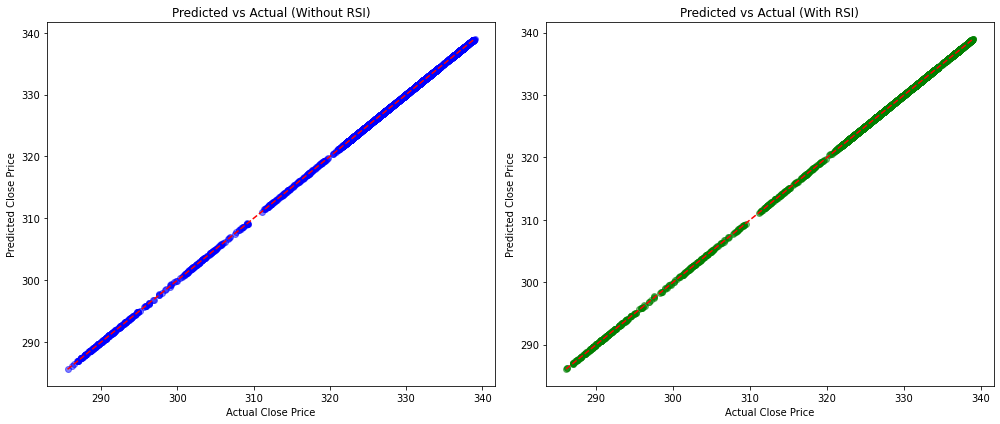

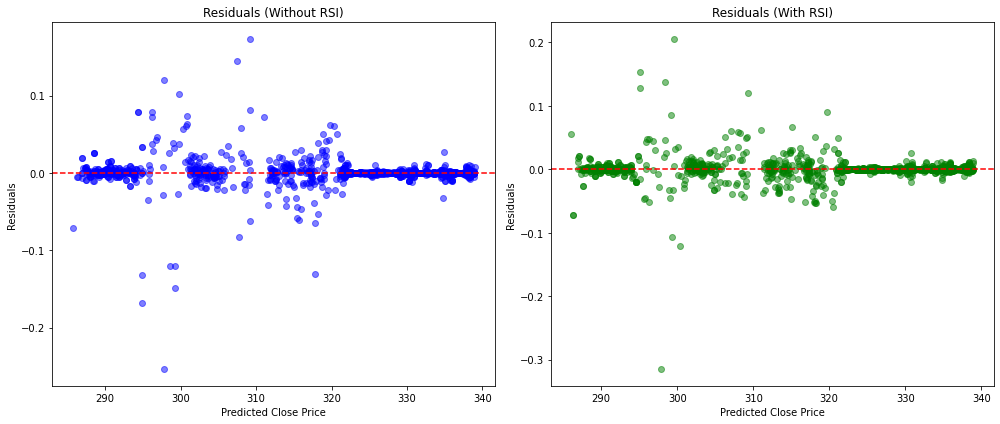

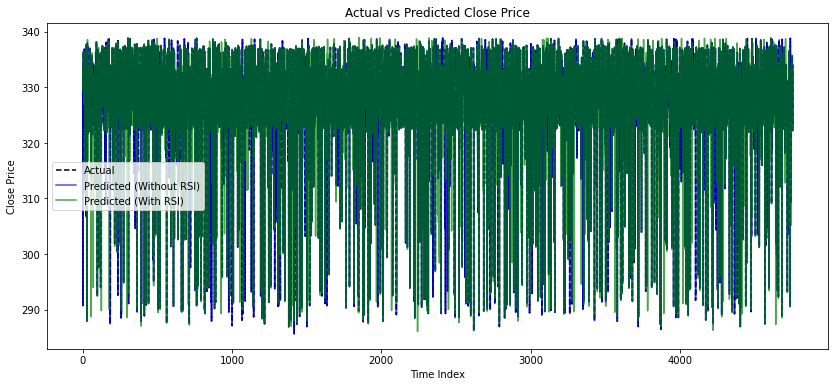

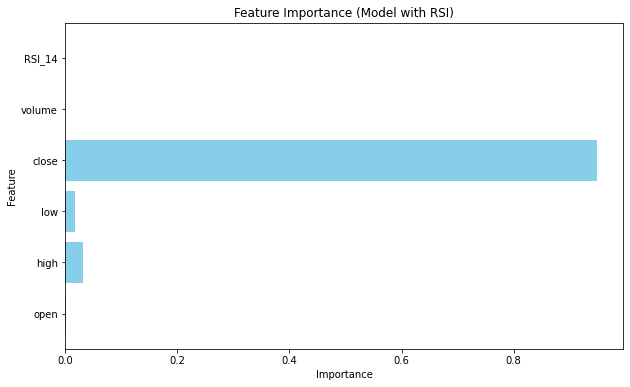

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df['close'])

# Prepare the feature set without RSI
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Prepare the feature set with RSI
X_with_rsi = df[['open', 'high', 'low', 'close', 'volume', 'RSI_14']].dropna()
y_with_rsi = df['close'][df['RSI_14'].notna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_rsi, X_test_rsi, y_train_rsi, y_test_rsi = train_test_split(X_with_rsi, y_with_rsi, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without RSI
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with RSI
rfr_rsi = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_rsi.fit(X_train_rsi, y_train_rsi)
y_pred_rsi = rfr_rsi.predict(X_test_rsi)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_rsi = mean_squared_error(y_test_rsi, y_pred_rsi)
r2_rsi = r2_score(y_test_rsi, y_pred_rsi)

# Print the performance metrics
print(f'MSE without RSI: {mse}')
print(f'R-squared without RSI: {r2}')
print(f'MSE with RSI: {mse_rsi}')
print(f'R-squared with RSI: {r2_rsi}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_test_rsi, y_pred_rsi, alpha=0.5, color='green')
plt.plot([y_test_rsi.min(), y_test_rsi.max()], [y_test_rsi.min(), y_test_rsi.max()], '--r')
plt.title('Predicted vs Actual (With RSI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without RSI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With RSI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rsi, y_test_rsi - y_pred_rsi, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With RSI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without RSI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_rsi)), y_pred_rsi, label='Predicted (With RSI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with RSI
feature_importances = rfr_rsi.feature_importances_
features = X_with_rsi.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with RSI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Bollinger Bands

MSE without Bollinger Bands: 9.144828709549665e-05
R-squared without Bollinger Bands: 0.9999991909602816
MSE with Bollinger Bands: 0.00012820418506822657
R-squared with Bollinger Bands: 0.9999988929686923


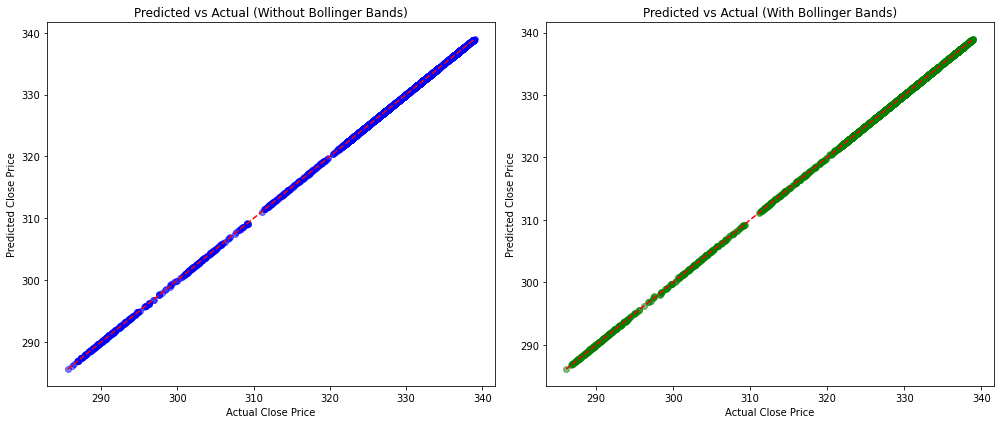

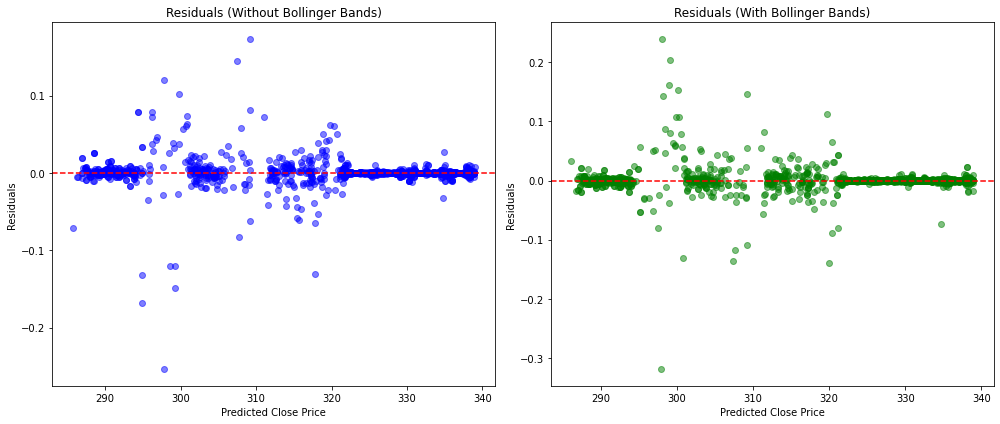

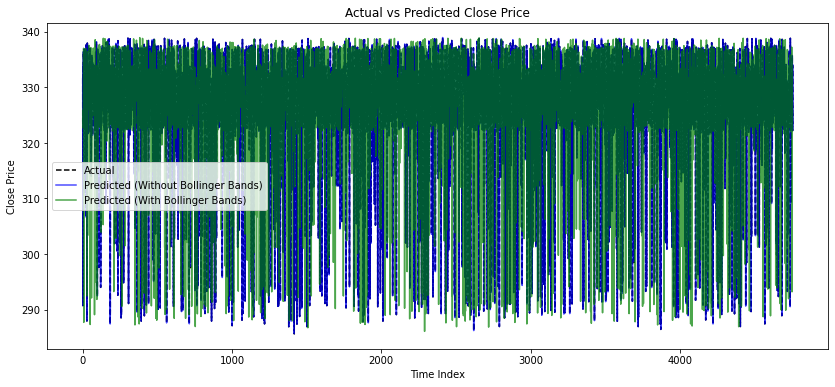

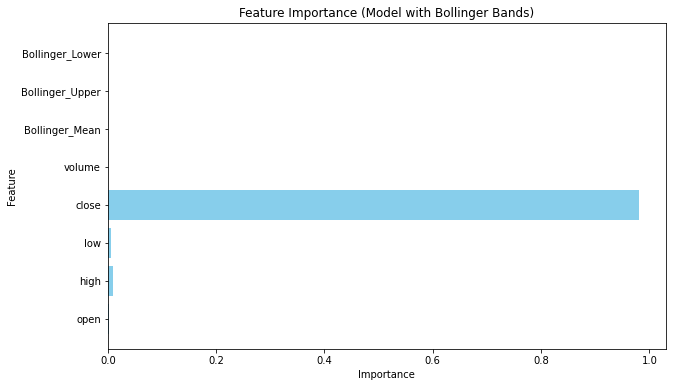

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the Bollinger Bands
def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return rolling_mean, upper_band, lower_band

df['Bollinger_Mean'], df['Bollinger_Upper'], df['Bollinger_Lower'] = calculate_bollinger_bands(df['close'])

# Prepare the feature set without Bollinger Bands
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Prepare the feature set with Bollinger Bands
X_with_bbands = df[['open', 'high', 'low', 'close', 'volume', 'Bollinger_Mean', 'Bollinger_Upper', 'Bollinger_Lower']].dropna()
y_with_bbands = df['close'][df['Bollinger_Mean'].notna()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bbands, X_test_bbands, y_train_bbands, y_test_bbands = train_test_split(X_with_bbands, y_with_bbands, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without Bollinger Bands
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with Bollinger Bands
rfr_bbands = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_bbands.fit(X_train_bbands, y_train_bbands)
y_pred_bbands = rfr_bbands.predict(X_test_bbands)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_bbands = mean_squared_error(y_test_bbands, y_pred_bbands)
r2_bbands = r2_score(y_test_bbands, y_pred_bbands)

# Print the performance metrics
print(f'MSE without Bollinger Bands: {mse}')
print(f'R-squared without Bollinger Bands: {r2}')
print(f'MSE with Bollinger Bands: {mse_bbands}')
print(f'R-squared with Bollinger Bands: {r2_bbands}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_test_bbands, y_pred_bbands, alpha=0.5, color='green')
plt.plot([y_test_bbands.min(), y_test_bbands.max()], [y_test_bbands.min(), y_test_bbands.max()], '--r')
plt.title('Predicted vs Actual (With Bollinger Bands)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Bollinger Bands
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Bollinger Bands
plt.subplot(1, 2, 2)
plt.scatter(y_pred_bbands, y_test_bbands - y_pred_bbands, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Bollinger Bands)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Bollinger Bands)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_bbands)), y_pred_bbands, label='Predicted (With Bollinger Bands)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Bollinger Bands
feature_importances = rfr_bbands.feature_importances_
features = X_with_bbands.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Bollinger Bands)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Stochastic Oscillator

MSE without Stochastic Oscillator: 9.144828709549665e-05
R-squared without Stochastic Oscillator: 0.9999991909602816
MSE with Stochastic Oscillator: 0.00011228324710825309
R-squared with Stochastic Oscillator: 0.99999901200945


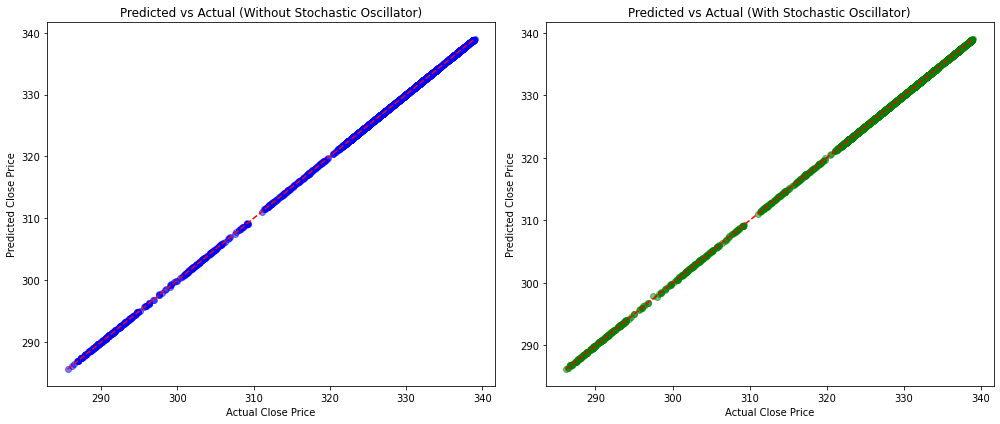

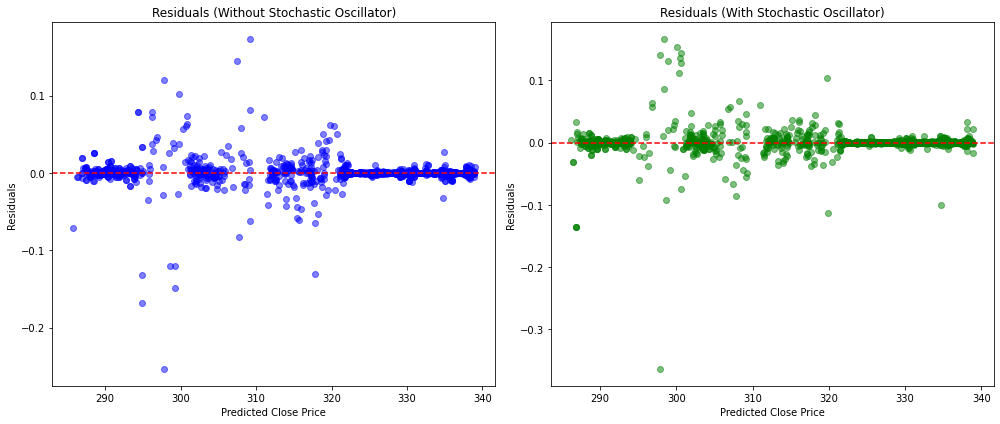

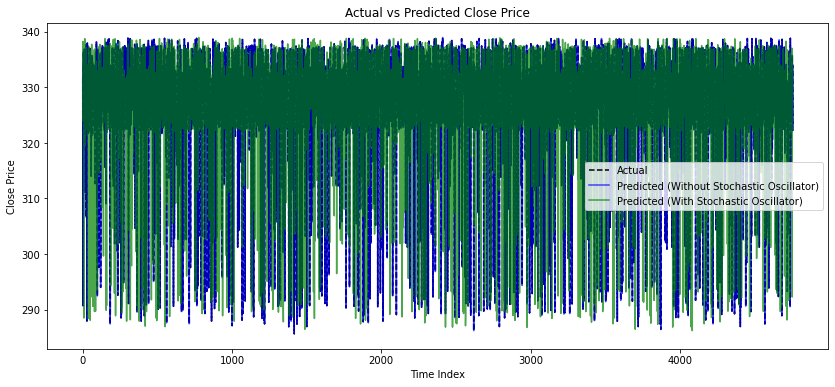

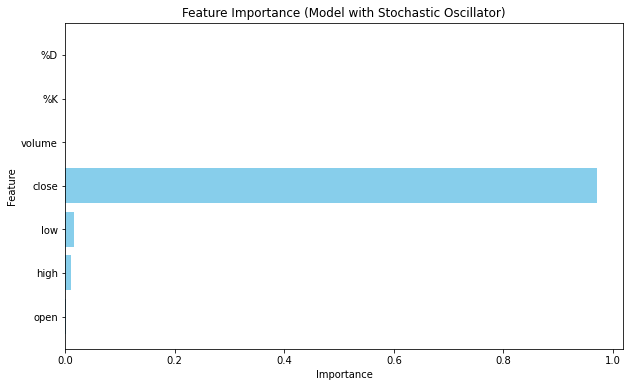

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the Stochastic Oscillator
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    high_rolling = df['high'].rolling(window=k_window).max()
    low_rolling = df['low'].rolling(window=k_window).min()
    df['%K'] = 100 * ((df['close'] - low_rolling) / (high_rolling - low_rolling))
    df['%D'] = df['%K'].rolling(window=d_window).mean()
    return df

df = calculate_stochastic_oscillator(df)

# Prepare the feature set with the Stochastic Oscillator
X_with_stoch = df[['open', 'high', 'low', 'close', 'volume', '%K', '%D']]
y_with_stoch = df['close']

# Drop rows with NaN values in either X_with_stoch or y_with_stoch
X_with_stoch = X_with_stoch.dropna()
y_with_stoch = y_with_stoch[X_with_stoch.index]

# Prepare the feature set without the Stochastic Oscillator
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_stoch, X_test_stoch, y_train_stoch, y_test_stoch = train_test_split(X_with_stoch, y_with_stoch, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without the Stochastic Oscillator
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with the Stochastic Oscillator
rfr_stoch = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_stoch.fit(X_train_stoch, y_train_stoch)
y_pred_stoch = rfr_stoch.predict(X_test_stoch)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_stoch = mean_squared_error(y_test_stoch, y_pred_stoch)
r2_stoch = r2_score(y_test_stoch, y_pred_stoch)

# Print the performance metrics
print(f'MSE without Stochastic Oscillator: {mse}')
print(f'R-squared without Stochastic Oscillator: {r2}')
print(f'MSE with Stochastic Oscillator: {mse_stoch}')
print(f'R-squared with Stochastic Oscillator: {r2_stoch}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_test_stoch, y_pred_stoch, alpha=0.5, color='green')
plt.plot([y_test_stoch.min(), y_test_stoch.max()], [y_test_stoch.min(), y_test_stoch.max()], '--r')
plt.title('Predicted vs Actual (With Stochastic Oscillator)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Stochastic Oscillator
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Stochastic Oscillator
plt.subplot(1, 2, 2)
plt.scatter(y_pred_stoch, y_test_stoch - y_pred_stoch, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Stochastic Oscillator)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Stochastic Oscillator)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_stoch)), y_pred_stoch, label='Predicted (With Stochastic Oscillator)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Stochastic Oscillator
feature_importances = rfr_stoch.feature_importances_
features = X_with_stoch.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Stochastic Oscillator)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Average Directional Index (ADX)

MSE without ADX: 9.144828709549665e-05
R-squared without ADX: 0.9999991909602816
MSE with ADX: 8.752742899228639e-05
R-squared with ADX: 0.9999992313622732


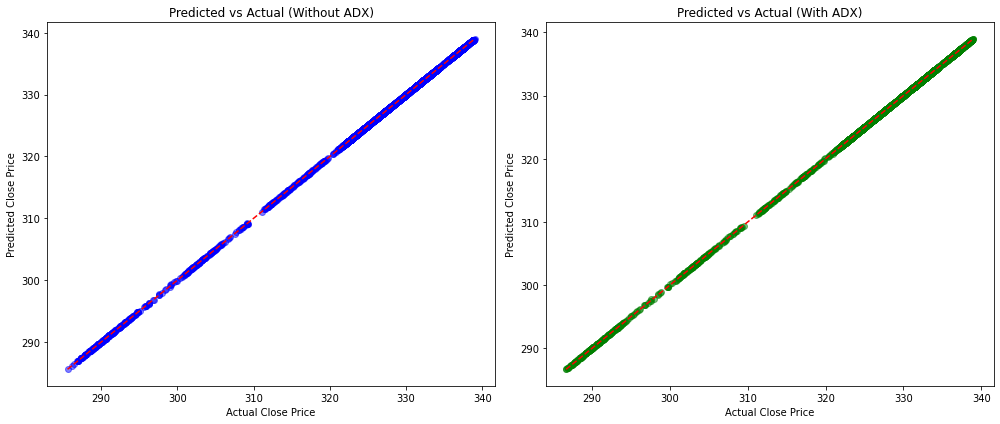

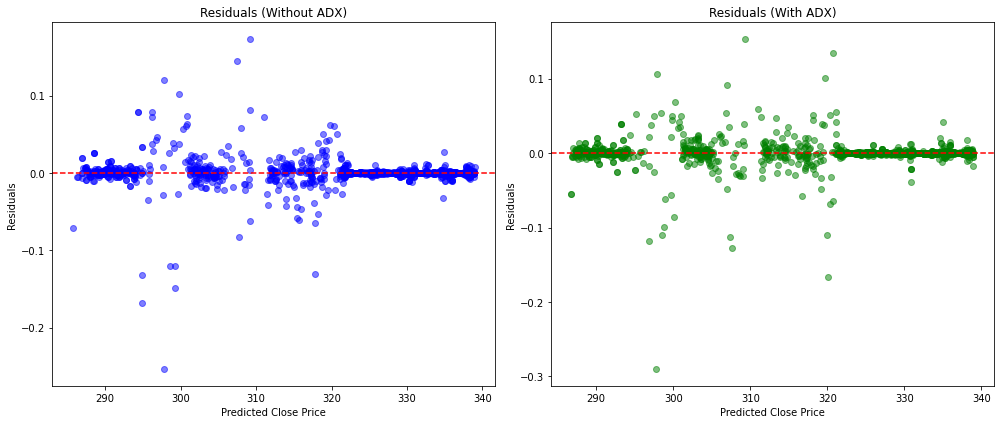

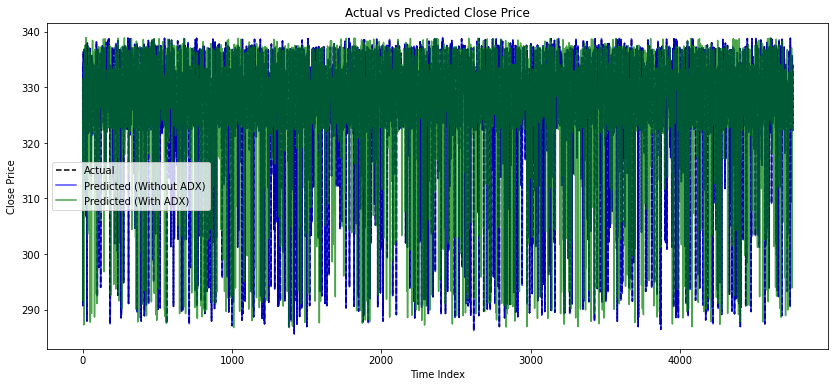

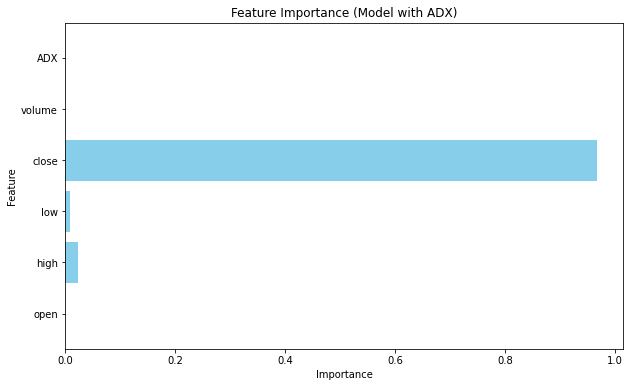

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the Average Directional Index (ADX)
def calculate_adx(df, n=14):
    df['TR'] = df[['high', 'low', 'close']].max(axis=1) - df[['high', 'low']].min(axis=1)
    df['+DM'] = np.where((df['high'] - df['high'].shift(1)) > (df['low'].shift(1) - df['low']), df['high'] - df['high'].shift(1), 0)
    df['+DM'] = np.where(df['+DM'] < 0, 0, df['+DM'])
    df['-DM'] = np.where((df['low'].shift(1) - df['low']) > (df['high'] - df['high'].shift(1)), df['low'].shift(1) - df['low'], 0)
    df['-DM'] = np.where(df['-DM'] < 0, 0, df['-DM'])
    df['TR'] = df['TR'].rolling(window=n).sum()
    df['+DM'] = df['+DM'].rolling(window=n).sum()
    df['-DM'] = df['-DM'].rolling(window=n).sum()
    df['+DI'] = 100 * (df['+DM'] / df['TR'])
    df['-DI'] = 100 * (df['-DM'] / df['TR'])
    df['DX'] = 100 * (np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))
    df['ADX'] = df['DX'].rolling(window=n).mean()
    return df

df = calculate_adx(df)

# Prepare the feature set with the ADX
X_with_adx = df[['open', 'high', 'low', 'close', 'volume', 'ADX']].dropna()
y_with_adx = df['close'][df['ADX'].notna()]

# Prepare the feature set without the ADX
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_adx, X_test_adx, y_train_adx, y_test_adx = train_test_split(X_with_adx, y_with_adx, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without the ADX
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with the ADX
rfr_adx = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_adx.fit(X_train_adx, y_train_adx)
y_pred_adx = rfr_adx.predict(X_test_adx)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_adx = mean_squared_error(y_test_adx, y_pred_adx)
r2_adx = r2_score(y_test_adx, y_pred_adx)

# Print the performance metrics
print(f'MSE without ADX: {mse}')
print(f'R-squared without ADX: {r2}')
print(f'MSE with ADX: {mse_adx}')
print(f'R-squared with ADX: {r2_adx}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_test_adx, y_pred_adx, alpha=0.5, color='green')
plt.plot([y_test_adx.min(), y_test_adx.max()], [y_test_adx.min(), y_test_adx.max()], '--r')
plt.title('Predicted vs Actual (With ADX)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without ADX
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With ADX
plt.subplot(1, 2, 2)
plt.scatter(y_pred_adx, y_test_adx - y_pred_adx, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With ADX)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without ADX)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_adx)), y_pred_adx, label='Predicted (With ADX)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with ADX
feature_importances = rfr_adx.feature_importances_
features = X_with_adx.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with ADX)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Commodity Channel Index (CCI)

MSE without CCI: 9.144828709549665e-05
R-squared without CCI: 0.9999991909602816
MSE with CCI: 0.00011607321976849774
R-squared with CCI: 0.9999989977184582


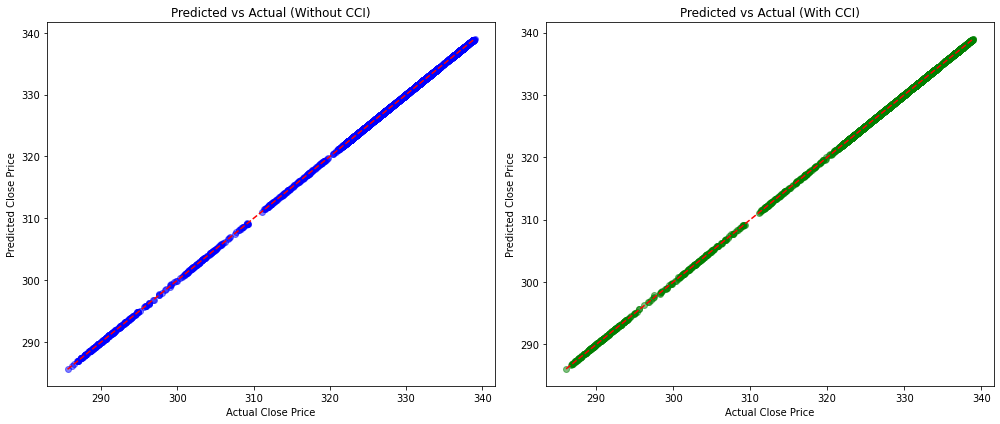

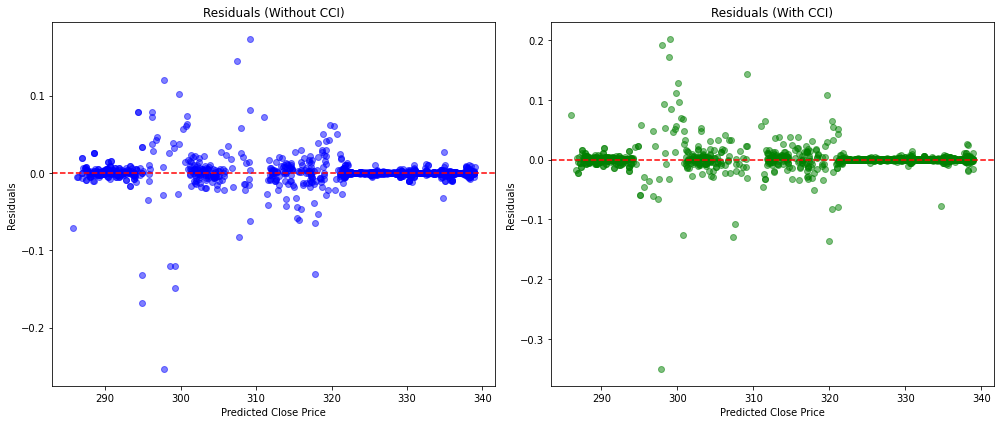

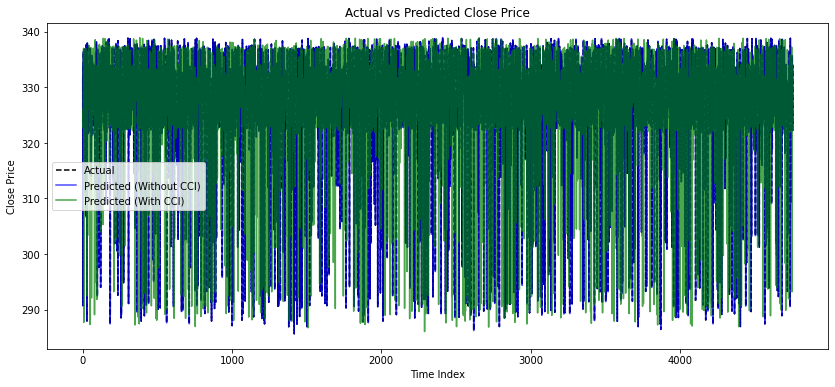

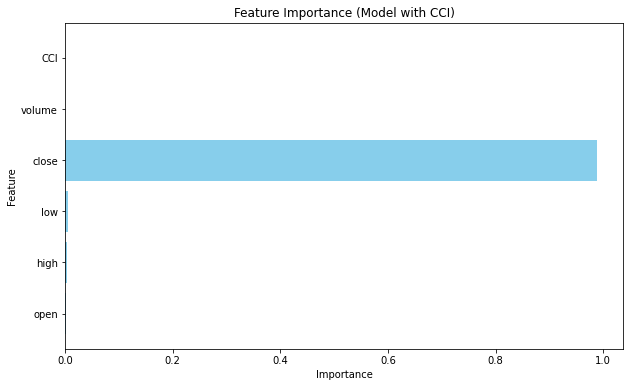

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the Commodity Channel Index (CCI)
def calculate_cci(df, ndays=20):
    df['TP'] = (df['high'] + df['low'] + df['close']) / 3
    df['sma'] = df['TP'].rolling(window=ndays).mean()
    df['mad'] = df['TP'].rolling(window=ndays).apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad'])
    return df

df = calculate_cci(df)

# Prepare the feature set with the CCI
X_with_cci = df[['open', 'high', 'low', 'close', 'volume', 'CCI']].dropna()
y_with_cci = df['close'][df['CCI'].notna()]

# Prepare the feature set without the CCI
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cci, X_test_cci, y_train_cci, y_test_cci = train_test_split(X_with_cci, y_with_cci, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without the CCI
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with the CCI
rfr_cci = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_cci.fit(X_train_cci, y_train_cci)
y_pred_cci = rfr_cci.predict(X_test_cci)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_cci = mean_squared_error(y_test_cci, y_pred_cci)
r2_cci = r2_score(y_test_cci, y_pred_cci)

# Print the performance metrics
print(f'MSE without CCI: {mse}')
print(f'R-squared without CCI: {r2}')
print(f'MSE with CCI: {mse_cci}')
print(f'R-squared with CCI: {r2_cci}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_test_cci, y_pred_cci, alpha=0.5, color='green')
plt.plot([y_test_cci.min(), y_test_cci.max()], [y_test_cci.min(), y_test_cci.max()], '--r')
plt.title('Predicted vs Actual (With CCI)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without CCI
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With CCI
plt.subplot(1, 2, 2)
plt.scatter(y_pred_cci, y_test_cci - y_pred_cci, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With CCI)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without CCI)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_cci)), y_pred_cci, label='Predicted (With CCI)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with CCI
feature_importances = rfr_cci.feature_importances_
features = X_with_cci.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with CCI)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


On-Balance Volume (OBV)

MSE without OBV: 9.144828709549665e-05
R-squared without OBV: 0.9999991909602816
MSE with OBV: 9.552346994539153e-05
R-squared with OBV: 0.999999154907285


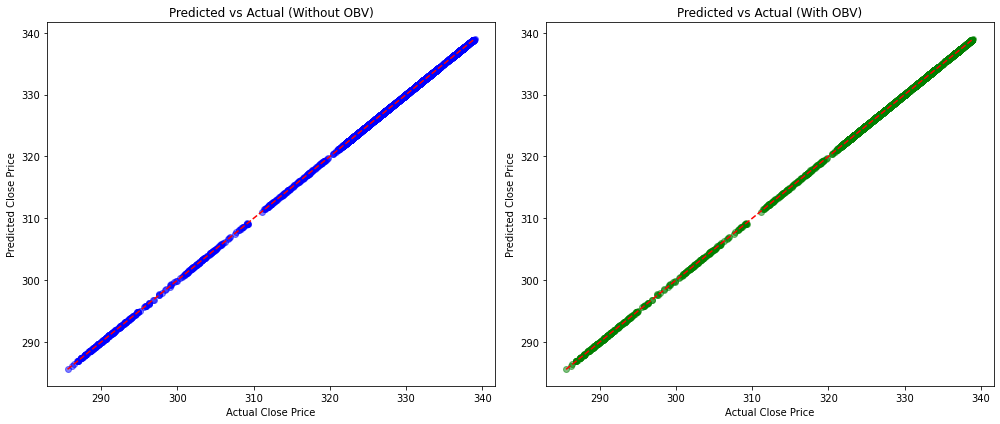

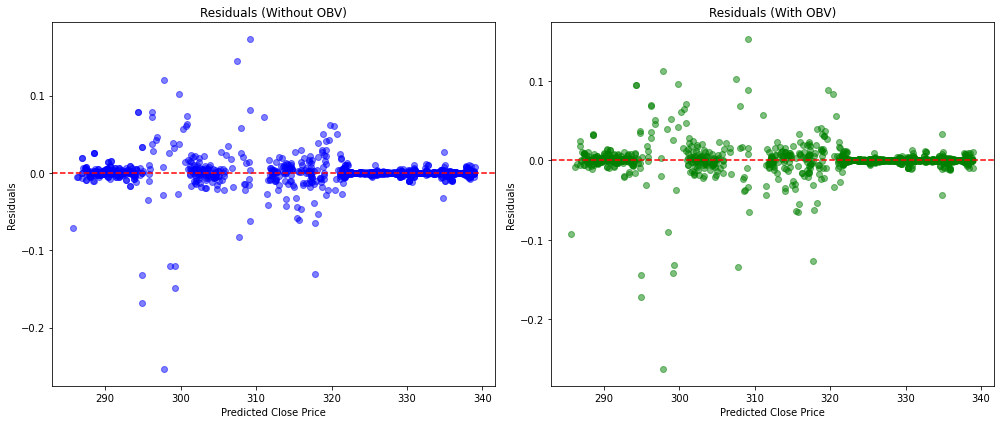

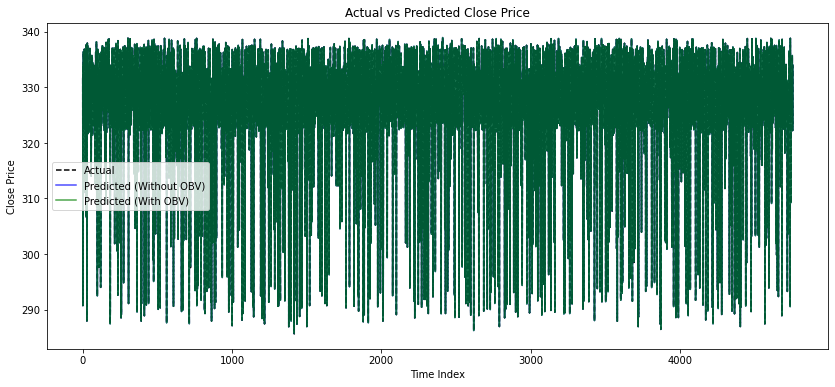

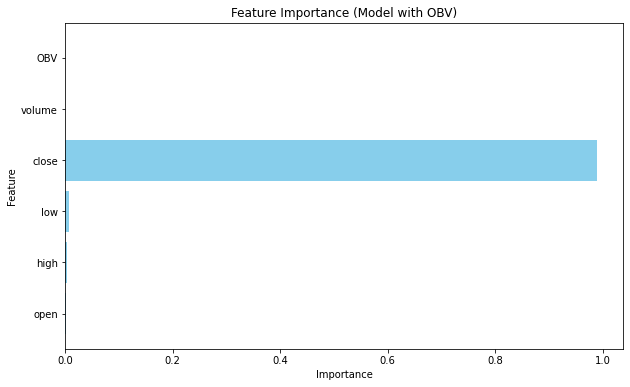

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate the On-Balance Volume (OBV)
def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['close'][i] > df['close'][i-1]:
            obv.append(obv[-1] + df['volume'][i])
        elif df['close'][i] < df['close'][i-1]:
            obv.append(obv[-1] - df['volume'][i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

df = calculate_obv(df)

# Prepare the feature set with the OBV
X_with_obv = df[['open', 'high', 'low', 'close', 'volume', 'OBV']].dropna()
y_with_obv = df['close'][df['OBV'].notna()]

# Prepare the feature set without the OBV
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_obv, X_test_obv, y_train_obv, y_test_obv = train_test_split(X_with_obv, y_with_obv, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without the OBV
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with the OBV
rfr_obv = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_obv.fit(X_train_obv, y_train_obv)
y_pred_obv = rfr_obv.predict(X_test_obv)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_obv = mean_squared_error(y_test_obv, y_pred_obv)
r2_obv = r2_score(y_test_obv, y_pred_obv)

# Print the performance metrics
print(f'MSE without OBV: {mse}')
print(f'R-squared without OBV: {r2}')
print(f'MSE with OBV: {mse_obv}')
print(f'R-squared with OBV: {r2_obv}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_test_obv, y_pred_obv, alpha=0.5, color='green')
plt.plot([y_test_obv.min(), y_test_obv.max()], [y_test_obv.min(), y_test_obv.max()], '--r')
plt.title('Predicted vs Actual (With OBV)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without OBV
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With OBV
plt.subplot(1, 2, 2)
plt.scatter(y_pred_obv, y_test_obv - y_pred_obv, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With OBV)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without OBV)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_obv)), y_pred_obv, label='Predicted (With OBV)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with OBV
feature_importances = rfr_obv.feature_importances_
features = X_with_obv.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with OBV)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Fibonacci Retracement

MSE without Fibonacci Retracement: 9.144828709549665e-05
R-squared without Fibonacci Retracement: 0.9999991909602816
MSE with Fibonacci Retracement: 0.00011773364879064243
R-squared with Fibonacci Retracement: 0.9999989833808068


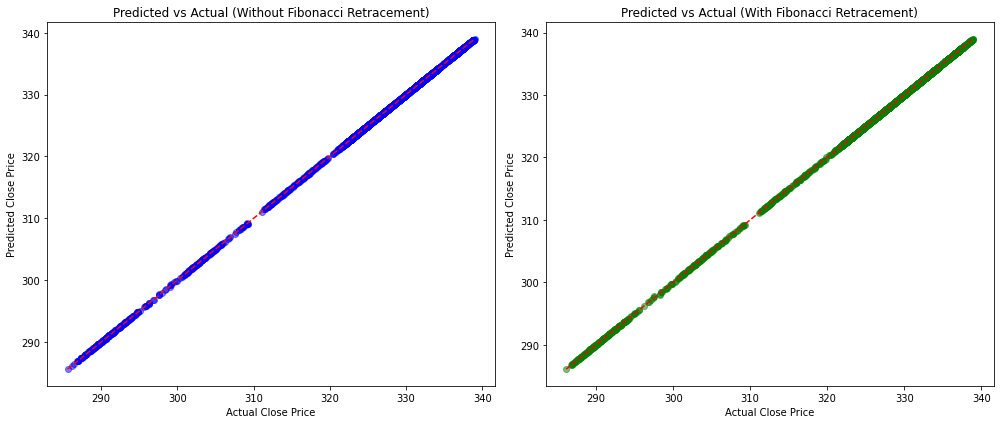

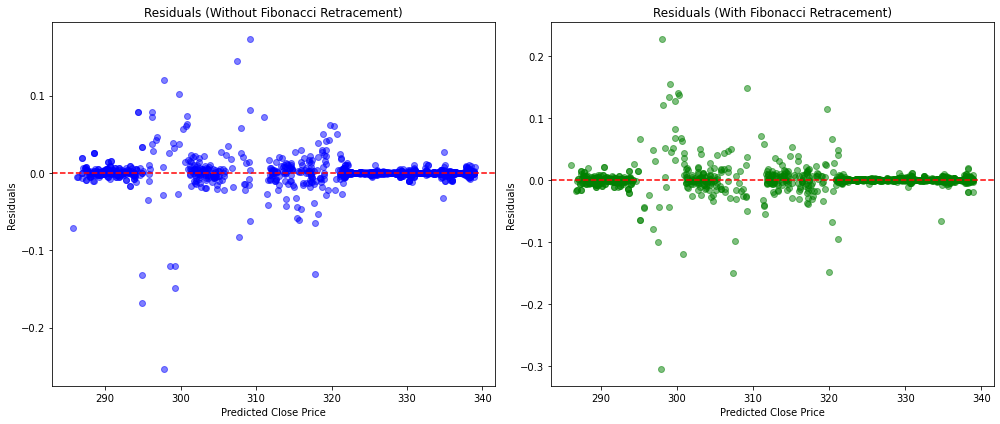

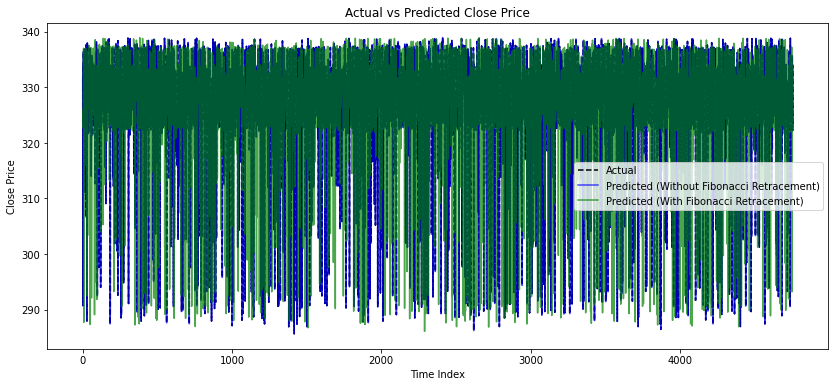

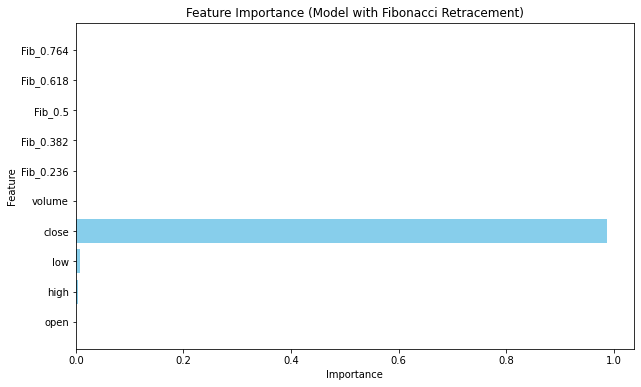

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('q1_filtered_dataset.csv')

# Calculate Fibonacci Retracement levels
def calculate_fibonacci_retracement(df, period=20):
    df['Max'] = df['high'].rolling(window=period).max()
    df['Min'] = df['low'].rolling(window=period).min()
    
    # Fibonacci levels
    df['Fib_0.236'] = df['Max'] - 0.236 * (df['Max'] - df['Min'])
    df['Fib_0.382'] = df['Max'] - 0.382 * (df['Max'] - df['Min'])
    df['Fib_0.5'] = df['Max'] - 0.5 * (df['Max'] - df['Min'])
    df['Fib_0.618'] = df['Max'] - 0.618 * (df['Max'] - df['Min'])
    df['Fib_0.764'] = df['Max'] - 0.764 * (df['Max'] - df['Min'])
    
    return df

df = calculate_fibonacci_retracement(df)

# Prepare the feature set with Fibonacci Retracement levels
X_with_fib = df[['open', 'high', 'low', 'close', 'volume', 'Fib_0.236', 'Fib_0.382', 'Fib_0.5', 'Fib_0.618', 'Fib_0.764']].dropna()
y_with_fib = df['close'][df['Fib_0.236'].notna()]

# Prepare the feature set without Fibonacci Retracement levels
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_fib, X_test_fib, y_train_fib, y_test_fib = train_test_split(X_with_fib, y_with_fib, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor without Fibonacci Retracement levels
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Initialize and train the Random Forest Regressor with Fibonacci Retracement levels
rfr_fib = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_fib.fit(X_train_fib, y_train_fib)
y_pred_fib = rfr_fib.predict(X_test_fib)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_fib = mean_squared_error(y_test_fib, y_pred_fib)
r2_fib = r2_score(y_test_fib, y_pred_fib)

# Print the performance metrics
print(f'MSE without Fibonacci Retracement: {mse}')
print(f'R-squared without Fibonacci Retracement: {r2}')
print(f'MSE with Fibonacci Retracement: {mse_fib}')
print(f'R-squared with Fibonacci Retracement: {r2_fib}')

# Plotting Predicted vs Actual for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual (Without Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_test_fib, y_pred_fib, alpha=0.5, color='green')
plt.plot([y_test_fib.min(), y_test_fib.max()], [y_test_fib.min(), y_test_fib.max()], '--r')
plt.title('Predicted vs Actual (With Fibonacci Retracement)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')

plt.tight_layout()
plt.show()

# Plotting Residuals for both models
plt.figure(figsize=(14, 6))

# Without Fibonacci Retracement
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Without Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

# With Fibonacci Retracement
plt.subplot(1, 2, 2)
plt.scatter(y_pred_fib, y_test_fib - y_pred_fib, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (With Fibonacci Retracement)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Time Series Plot of Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='black', linestyle='--')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted (Without Fibonacci Retracement)', color='blue', alpha=0.7)
plt.plot(np.arange(len(y_pred_fib)), y_pred_fib, label='Predicted (With Fibonacci Retracement)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance Plot for the model with Fibonacci Retracement
feature_importances = rfr_fib.feature_importances_
features = X_with_fib.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance (Model with Fibonacci Retracement)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Comparing all the Indicators-  Use statistical testing and visual Comparision

In [36]:
import pandas as pd

# Assuming these are the metrics you calculated earlier
results = {
    'Technical Indicator': ['None', 'SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement'],
    'MSE': [mse, mse_sma, mse_ema, mse_macd, mse_rsi, mse_bbands, mse_stoch, mse_adx, mse_cci, mse_obv, mse_fib],
    'R-squared': [r2, r2_sma, r2_ema, r2_macd, r2_rsi, r2_bbands, r2_stoch, r2_adx, r2_cci, r2_obv, r2_fib]
}

results_df = pd.DataFrame(results)
print(results_df)


      Technical Indicator       MSE  R-squared
0                    None  0.000091   0.999999
1                     SMA  0.000091   0.999999
2                     EMA  0.000098   0.999999
3                    MACD  0.000104   0.999999
4                     RSI  0.000092   0.999999
5         Bollinger Bands  0.000128   0.999999
6   Stochastic Oscillator  0.000112   0.999999
7                     ADX  0.000088   0.999999
8                     CCI  0.000116   0.999999
9                     OBV  0.000096   0.999999
10  Fibonacci Retracement  0.000118   0.999999


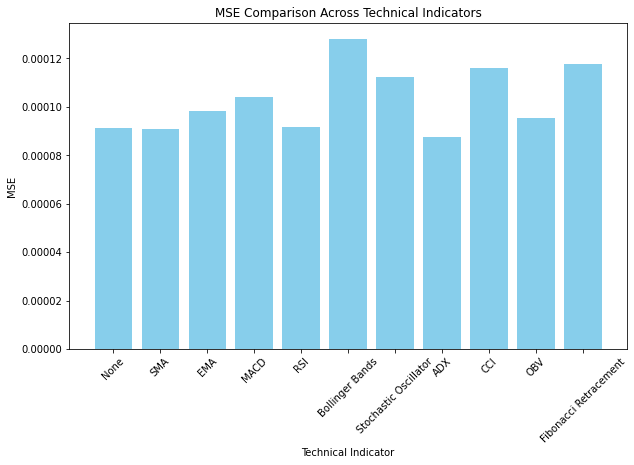

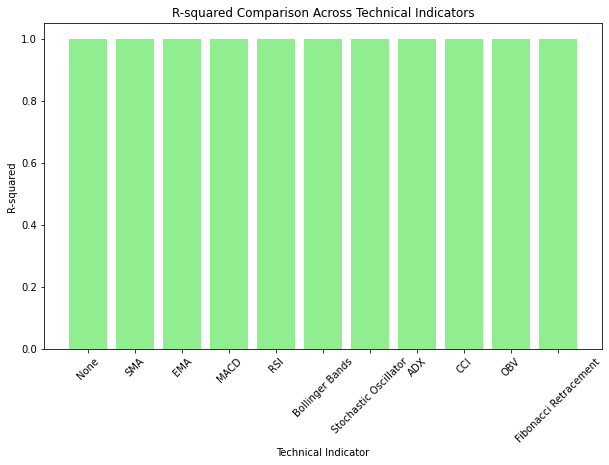

In [38]:
import matplotlib.pyplot as plt

# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['MSE'], color='skyblue')
plt.title('MSE Comparison Across Technical Indicators')
plt.xlabel('Technical Indicator')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

# Plotting R-squared comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Technical Indicator'], results_df['R-squared'], color='lightgreen')
plt.title('R-squared Comparison Across Technical Indicators')
plt.xlabel('Technical Indicator')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()


Perform paired t-tests for each indicator comparing the MSE from the cross-validated models with and without the indicator.

In [41]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# Initialize results list
t_test_results = []

# List of indicators and their respective feature sets
indicators = ['SMA', 'EMA', 'MACD', 'RSI', 'Bollinger Bands', 'Stochastic Oscillator', 'ADX', 'CCI', 'OBV', 'Fibonacci Retracement']
models_with_indicators = [rfr_sma, rfr_ema, rfr_macd, rfr_rsi, rfr_bbands, rfr_stoch, rfr_adx, rfr_cci, rfr_obv, rfr_fib]
X_with_indicators = [X_with_sma, X_with_ema, X_with_macd, X_with_rsi, X_with_bbands, X_with_stoch, X_with_adx, X_with_cci, X_with_obv, X_with_fib]
y_with_indicators = [y_with_sma, y_with_ema, y_with_macd, y_with_rsi, y_with_bbands, y_with_stoch, y_with_adx, y_with_cci, y_with_obv, y_with_fib]

# Perform cross-validation and paired t-test for each indicator
for indicator, model_with_indicator, X_with_indicator, y_with_indicator in zip(indicators, models_with_indicators, X_with_indicators, y_with_indicators):
    # Cross-validation without the indicator
    cv_mse_without_indicator = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse_without_indicator = -cv_mse_without_indicator

    # Cross-validation with the indicator
    cv_mse_with_indicator = cross_val_score(model_with_indicator, X_with_indicator, y_with_indicator, cv=5, scoring='neg_mean_squared_error')
    cv_mse_with_indicator = -cv_mse_with_indicator

    # Perform paired t-test
    t_stat, p_value = ttest_rel(cv_mse_without_indicator, cv_mse_with_indicator)
    
    # Append results to the list
    t_test_results.append({
        'Technical Indicator': indicator,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to DataFrame
t_test_results_df = pd.DataFrame(t_test_results)

# Display the results
print(t_test_results_df)


     Technical Indicator  t-statistic   p-value
0                    SMA     0.893566  0.422058
1                    EMA     0.981552  0.381894
2                   MACD    -1.003331  0.372473
3                    RSI     0.356671  0.739358
4        Bollinger Bands     0.974749  0.384879
5  Stochastic Oscillator    -1.080717  0.340629
6                    ADX    -1.026533  0.362660
7                    CCI     0.964175  0.389558
8                    OBV    -1.012951  0.368377
9  Fibonacci Retracement     0.879225  0.428928


The paired t-test results show that none of the technical indicators—SMA, EMA, MACD, RSI, Bollinger Bands, Stochastic Oscillator, ADX, CCI, OBV, and Fibonacci Retracement—significantly improved the prediction accuracy of the Random Forest Regressor (RFR) model. 

- **t-statistics**: These values are close to zero, indicating minimal differences in Mean Squared Error (MSE) between models with and without each indicator.
- **p-values**: All p-values are well above 0.05, meaning the differences in MSE are not statistically significant.

In summary, adding these technical indicators does not meaningfully enhance the model’s predictive performance for this dataset.